Data prep
data split
logisticregression model

#Data prep

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn

# Load the breast cancer dataset
data = load_breast_cancer()


# Extract the feature matrix (X) and target labels (y)
X = data.data
y = data.target


In [2]:
data_df = pd.DataFrame(data = data.data,
                       columns = data.feature_names)
data_df.head().T
#print(data.DESCR) 

# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
df['target'] = data.target
# Show the first five rows
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
data.keys()  

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy before optimization: 0.9736842105263158
Classification Report before optimization:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix before optimization:


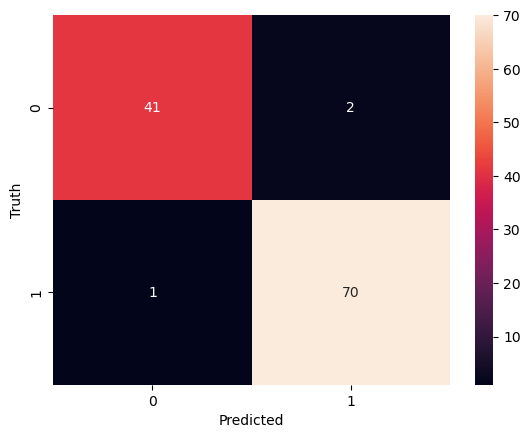

True Positives (TP): 70
True Negatives (TN): 41
False Positives (FP): 2
False Negatives (FN): 1


In [6]:
# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000, solver='saga')

# Train the Logistic Regression model on the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the classifier with 3 metrics
# Accuracy
accuracyB = accuracy_score(y_test, y_pred)
print("Accuracy before optimization:", accuracyB)

# Classification Report
print("Classification Report before optimization:")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Confusion Matrix
print("Confusion Matrix before optimization:")
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate TP, TN, FP, and FN
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Display TP, TN, FP, and FN
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

Best Hyperparameters: {'C': 1, 'penalty': 'l1'}
Best Score: 0.9780219780219781
Accuracy after optimization: 0.9649122807017544
Classification Report after optimization:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix after optimization:


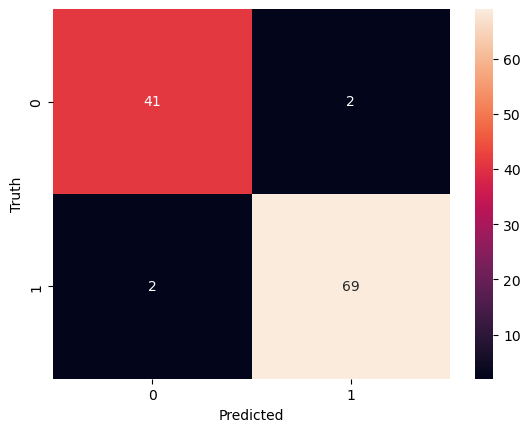

True Positives (TP): 69
True Negatives (TN): 41
False Positives (FP): 2
False Negatives (FN): 2


In [7]:
# Define hyperparameters to tune
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Define logistic regression model with increased max_iter and 'saga' solver
model = LogisticRegression(max_iter=10000, solver='saga', C=0.1, penalty='l1')


# Define GridSearchCV object
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit model
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print best score
print("Best Score:", grid_search.best_score_)

# Use best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate performance of best model
accuracyA = accuracy_score(y_test, y_pred)
print("Accuracy after optimization:", accuracyA)

# Classification Report
print("Classification Report after optimization:")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Confusion Matrix
print("Confusion Matrix after optimization:")
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate TP, TN, FP, and FN
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Display TP, TN, FP, and FN
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

Accuracy before parameter optimization: 0.97
Accuracy for after parameter optimization: 0.96


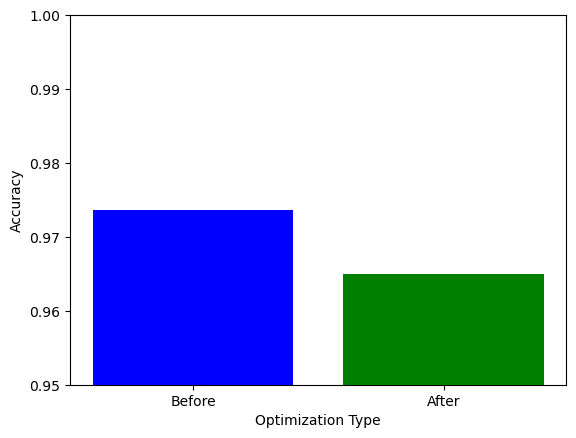

In [8]:
print("Accuracy before parameter optimization: {:.2f}".format(accuracyB))
print("Accuracy for after parameter optimization: {:.2f}".format(accuracyA))

labels = ['Before', 'After']
accuracy_scores = [accuracyB, accuracyA]

#chart to see difference
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Optimization Type')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1)
plt.show()


c) Explain the Confusion Matrix obtained in (a) y (b), that is,
before and after parameters optimization.

The confusion matrix before optimization was already fairly high with a 97% accuaracy, but after optimization there was a decrease by 0.01 percent.  the improvments of optimization during logistic regression are just modest at best or even negligible at best.  